In [1]:
import os
import sys
if os.path.realpath('..') not in sys.path: 
    sys.path.append(os.path.realpath('..'))
import pandas as pd
import pandas as pd
import numpy as np
from utils import data_processing
import seaborn as sns
from matplotlib import pyplot as plt
from utils import plots

df = pd.read_csv(os.path.join('..','dft_calc','combined.csv'))

In [2]:
X = df.fingerprint
y = df.MA 
X = pd.concat([X,pd.DataFrame({'intercept':np.ones(len(X))})],axis=1)

In [3]:
ir_dft_coefs = data_processing.linear_regression(X, y, print_whole_table=False)

╔═════════════╦══════════════╗
║             ║   coeficient ║
╠═════════════╬══════════════╣
║ fingerprint ║       0.4859 ║
║ intercept   ║       5.6173 ║
╚═════════════╩══════════════╝
Pearson correlation coeficient = 0.758


C:\Users\CroninGroup\AppData\Local\Temp\ipykernel_174392\2651124441.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


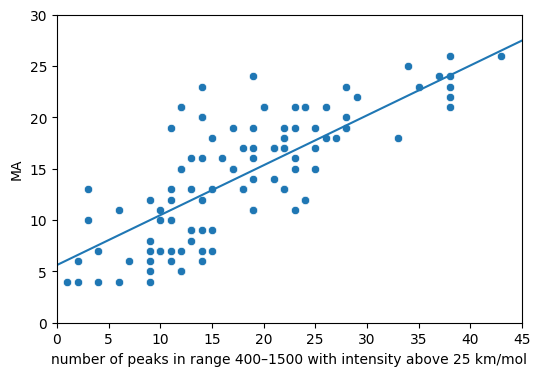

In [4]:
fig, ax = plt.subplots(figsize=(6,4))

sns.scatterplot(y=y.tolist(),x=df.fingerprint)
plt.plot([0, 45], [ir_dft_coefs[1], 45*ir_dft_coefs[0] + ir_dft_coefs[1]])

ax.set_ylim(0,30)
ax.set_xlim(0,45)
ax.set_ylabel('MA')
ax.set_xlabel('number of peaks in range 400–1500 with intensity above 25 km/mol')
fig.show()

In [5]:
dft_pred_temp = X*ir_dft_coefs
ir_dft_assembly_prediction = dft_pred_temp.sum(axis=1).apply(round).rename('a_pred')
ir_dft_assembly_real = y.rename('a_real')
ir_dft_A2plot = pd.concat([ir_dft_assembly_prediction,ir_dft_assembly_real],axis=1)

In [6]:
fig = plots.nice_heat_log(ir_dft_A2plot,'a_real','a_pred',
  base_colour=[0,0,100],
  title = f'Theoretical IR data (DFT based)',
  xaxis_title='Molecular Assembly',
  yaxis_title=f'Predicted Molecular Assembly Based on DFT IR',
  logbase = 1.4,
  tickvals = [0, 1, 2, 3, 4],
  xaxis_max = 30, 
  yaxis_max = 30, 
)
fig.show()
# plotly.io.write_image(fig, os.path.join('..','figures','theoretical_ir.pdf'), format='pdf')